# Calculating the depression in percentage from the preprocessed twitter data

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

tweets_data_path = 'data/tweetdata.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweets = pd.DataFrame()

tweets['text'] =list( map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))

.

# Most used languages

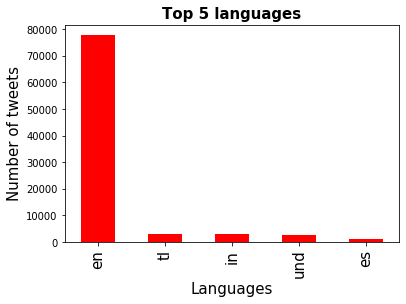

In [3]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

.

# Most tweeted countries

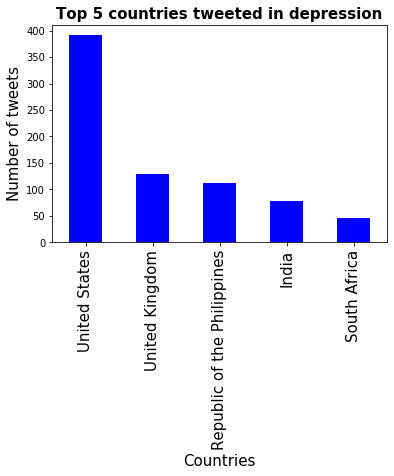

In [7]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries tweeted in depression', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

.

# Wordcloud Analysis

In [8]:
from wordcloud import WordCloud
from math import log, sqrt
tweets.head(20)

,text,lang,country
0,kung sugtan sad ko di pud ko mo laag kay di ma...,tl,None
1,Mourning the loss of another human being for m...,en,None
2,You can’t afford to look down on a Wilder figh...,en,None
3,RT @Education4Libs: BREAKING NEWS:\n\nPhilip H...,en,None
4,RT @FLjasmy: Wow... upside down wedding cake. ...,en,None
5,RT @JoyceWhiteVance: Same President who was wi...,en,None
6,RT @Sun_Q_Tzu: Phil Haney committed suicide. R...,en,None
7,omg no he looks so upset,en,None
8,RT @Jali_Cat: ‼️@washingtonpost &amp; @nytimes...,en,None
9,RT @AceHelpsPrint: #AceHelpsPrint NOW OPEN!!\n...,en,None


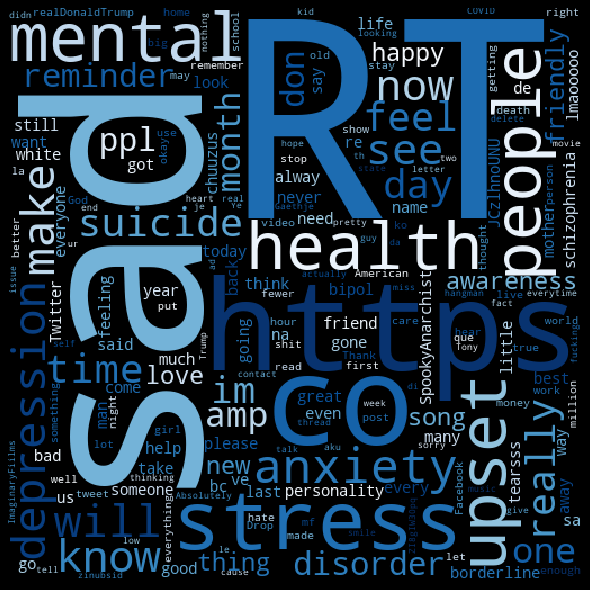

In [18]:
depressive_words = ' '.join(list(tweets['text']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Keyword that most of the time used:

In [35]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

# tokenize the keywords

In [38]:
tweets['depression'] = tweets['text'].apply(lambda tweet: word_in_text('depression', tweet))
tweets['sad'] = tweets['text'].apply(lambda tweet: word_in_text('sad', tweet))
tweets['suicide'] = tweets['text'].apply(lambda tweet: word_in_text('suicide', tweet))
tweets['mental'] = tweets['text'].apply(lambda tweet: word_in_text('mental health', tweet))
tweets['anxiety'] = tweets['text'].apply(lambda tweet: word_in_text('anxiety', tweet))
tweets['stress'] = tweets['text'].apply(lambda tweet: word_in_text('stress', tweet))
total_tweets=(len(tweets))

# Grap which shows the keywords uses vs number of tweets

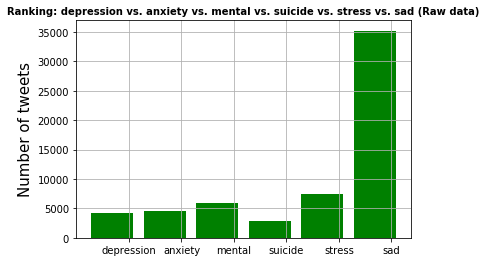

In [41]:
prg_langs = ['depression', 'anxiety', 'mental', 'suicide', 'stress', 'sad']
tweets_by_prg_lang = [tweets['depression'].value_counts()[True], tweets['anxiety'].value_counts()[True], tweets['mental'].value_counts()[True],tweets['suicide'].value_counts()[True],tweets['stress'].value_counts()[True],tweets['sad'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: depression vs. anxiety vs. mental vs. suicide vs. stress vs. sad (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()
d_total=(tweets['depression'].value_counts()[True]+tweets['sad'].value_counts()[True]+tweets['mental'].value_counts()[True]+tweets['anxiety'].value_counts()[True]+tweets['stress'].value_counts()[True])
depre_per=(d_total/total_tweets)*100


# The depression tweets percentage:::::

In [43]:
print("**************************************************************\n")
print("The depression tweets in percentage:\t",depre_per,"\n")
print("**************************************************************")

**************************************************************

The depression tweets in percentage:	 63.21566464423607 

**************************************************************
